<a href="https://colab.research.google.com/github/rliquitay/icaro/blob/main/NLP_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segunda entrega

En esta segunda entrega vamos a hacer un análisis de reviews en Yelp.

Dado el siguiente dataset https://drive.google.com/file/d/1sVeJE4zd1fmLnOgYI5QlQeaeaTGa8kIE/view?usp=sharing:

Deberán hacer un análisis de las reviews.

El análisis no tiene limites y pueden agregar todas las ideas que les surjan, pero como mínimo debe incluir: keywords y tópicos por negocio (business id), sentimiento de cada review, entidades por review, negocio con más comentarios positivos y negocio con más comentarios negativos.

Además, pueden agregar por ejemplo (Opcional): Tópicos asociados sentimientos, keywords asociadas a sentimientos, sentimientos a lo largo del tiempo (utilizando la columna date)...

### Entrega

**Fecha limite**: 18/09/2022. 

Deben compartir el notebook con todo el análisis realizado en la tarjeta de spritn 2 (recuerden que si entregan un colab, compartirlo con el mail del profe para que tenga acceso).


### Presentación

**Fecha**: Lunes 19/09/2022 y Jueves 22/09/2022.

La presentación NO debe ser una presentación del notebook. La presentación debe constar de filminas que muestren los **resultados** que obtuvieron, mencionar herramientas que utilizaron, que decisiones tomaron y conclusiones. No deben mostrar nada de código en la presentación.

Una vez que ya hayan presentado (por ejemplo un powerpoint), podemos resolver las dudas que surjan sobre código, etc.



###Importar librerías necesarias

In [1]:
!pip install matplotlib=="3.5.2"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [71]:
!pip install keybert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 3.6 MB/s 
     |████████████████████████████████| 235 kB 18.6 MB/s 
     |████████████████████████████████| 51 kB 8.7 MB/s 
     |████████████████████████████████| 4.7 MB 59.6 MB/s 
     |████████████████████████████████| 1.3 MB 50.4 MB/s 
     |████████████████████████████████| 120 kB 71.5 MB/s 
     |████████████████████████████████| 6.6 MB 47.1 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=a053171b43451bc367cb6d9e73665bbce87ab3b6dec7b4ebcf27ec36c9baf1d0
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers


In [139]:
!pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 90 kB 6.0 MB/s 
     |████████████████████████████████| 5.2 MB 55.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 88 kB 7.9 MB/s 
     |████████████████████████████████| 636 kB 50.3 MB/s 
     |████████████████████████████████| 1.1 MB 40.8 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2340333 sha256=93a932c24f1f76a5ac482211b8428faad77575c8575d7d550185f6484112e80a
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=9d64844ae98863fc199ec391c6467b901c5fc81a2a1e1287c165e8387bf23530
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1f

In [140]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import spacy
nlp = spacy.load("en_core_web_sm")
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
from scipy import stats
import numpy as np
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re, string
import sys
import time
import collections
from keybert import KeyBERT
from bertopic import BERTopic

###Leer archivo con reviews

In [4]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1sVeJE4zd1fmLnOgYI5QlQeaeaTGa8kIE' -O reviews.csv

--2022-09-12 19:30:11--  https://docs.google.com/uc?export=download&id=1sVeJE4zd1fmLnOgYI5QlQeaeaTGa8kIE
Resolving docs.google.com (docs.google.com)... 74.125.137.139, 74.125.137.100, 74.125.137.113, ...
Connecting to docs.google.com (docs.google.com)|74.125.137.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-74-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/i3de2tmbimtl0u88krbu322j362arqeq/1663011000000/14260194928165318342/*/1sVeJE4zd1fmLnOgYI5QlQeaeaTGa8kIE?e=download&uuid=e675d5d4-ff4b-4c5d-a1d0-5fabf6544d49 [following]
--2022-09-12 19:30:15--  https://doc-10-74-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/i3de2tmbimtl0u88krbu322j362arqeq/1663011000000/14260194928165318342/*/1sVeJE4zd1fmLnOgYI5QlQeaeaTGa8kIE?e=download&uuid=e675d5d4-ff4b-4c5d-a1d0-5fabf6544d49
Resolving doc-10-74-docs.googleusercontent.com (doc-10-74-docs.googleusercontent.com)... 142.251.2.132, 2607:f8b0:4

In [5]:
df = pd.read_csv("/content/reviews.csv")
df.head()

,user_id,review_id,text,votes.cool,business_id,votes.funny,stars,date,type,votes.useful
0,PUFPaY9KxDAcGqfsorJp3Q,Ya85v4eqdd6k9Od8HbQjyA,"Mr Hoagie is an institution. Walking in, it do...",0,5UmKMjUEUNdYWqANhGckJw,0,4,2012-08-01,review,0
1,Iu6AxdBYGR4A0wspR9BYHA,KPvLNJ21_4wbYNctrOwWdQ,Excellent food. Superb customer service. I mis...,0,5UmKMjUEUNdYWqANhGckJw,0,5,2014-02-13,review,0
2,auESFwWvW42h6alXgFxAXQ,fFSoGV46Yxuwbr3fHNuZig,Yes this place is a little out dated and not o...,0,5UmKMjUEUNdYWqANhGckJw,0,5,2015-10-31,review,0
3,uK8tzraOp4M5u3uYrqIBXg,Di3exaUCFNw1V4kSNW5pgA,All the food is great here. But the best thing...,0,UsFtqoBl7naz8AVUBZMjQQ,0,5,2013-11-08,review,0
4,I_47G-R2_egp7ME5u_ltew,0Lua2-PbqEQMjD9r89-asw,We checked this place out this past Monday for...,0,UsFtqoBl7naz8AVUBZMjQQ,0,3,2014-03-29,review,0


###Análisis Exploratorio 🔍

In [6]:
print(f"El archivo cuenta con {df.shape[0]} registros o filas y {df.shape[1]} features o columnas.")

El archivo cuenta con 27290 registros o filas y 10 features o columnas.


In [7]:
print(f"Las columnas o features son {df.columns}.")

Las columnas o features son Index(['user_id', 'review_id', 'text', 'votes.cool', 'business_id',
       'votes.funny', 'stars', 'date', 'type', 'votes.useful'],
      dtype='object').


In [8]:
print(f"Hay {df['business_id'].nunique()} comercios evaluados.")

Hay 1320 comercios evaluados.


In [9]:
print(f"Hay {df['user_id'].nunique()} usuarios que emitieron su opinión.")

Hay 14861 usuarios que emitieron su opinión.


In [10]:
print(f"Los 10 principales comercios sobre los que la gente opinó recibieron más de 200 reviews y fueron: \n {df.business_id.value_counts().head(10)}")

Los 10 principales comercios sobre los que la gente opinó recibieron más de 200 reviews y fueron: 
 3Q0QQPnHcJuX1DLCL9G9Cg    1068
mpDxBBGywUE6GRRKja3sBA     527
NeUf9FyCCIN4MEseNyqkXQ     387
jTGQUWGIVvL-aY03C5BEmw     292
NTfUFk8GyOLL1uPbEO-pVg     250
XmdTkxKyJd7TuDLoiic1kg     249
vgXE1I7c9ElcfYyZfQiN1Q     243
2X5G4Ujq0s4Wfn4TC7gX0g     243
2SwC8wqpZC4B9iFVTgYT9A     239
rgmptwPbBH1wLpiBHcbIhA     221
Name: business_id, dtype: int64


In [11]:
print(f"En términos porcentuales las reviews de estos comercios no representan más del 4 % cada uno: \n {df.business_id.value_counts('%').head(10)}")

En términos porcentuales las reviews de estos comercios no representan más del 4 % cada uno: 
 3Q0QQPnHcJuX1DLCL9G9Cg    0.039135
mpDxBBGywUE6GRRKja3sBA    0.019311
NeUf9FyCCIN4MEseNyqkXQ    0.014181
jTGQUWGIVvL-aY03C5BEmw    0.010700
NTfUFk8GyOLL1uPbEO-pVg    0.009161
XmdTkxKyJd7TuDLoiic1kg    0.009124
vgXE1I7c9ElcfYyZfQiN1Q    0.008904
2X5G4Ujq0s4Wfn4TC7gX0g    0.008904
2SwC8wqpZC4B9iFVTgYT9A    0.008758
rgmptwPbBH1wLpiBHcbIhA    0.008098
Name: business_id, dtype: float64


In [12]:
print(f"Los 10 principales usuarios que escribieron reviews fueron: \n {df.user_id.value_counts().head(10)}")

Los 10 principales usuarios que escribieron reviews fueron: 
 iTmWHtltCtk0Gm55AOxrUA    113
nEYPahVwXGD2Pjvgkm7QqQ     84
-_1ctLaz3jhPYc12hKXsEQ     82
q7MrNVt1FE23rwtWmPYWHg     69
UD7Y1CqfY6mDmRwIuCf6nA     68
VhI6xyylcAxi0wOy2HOX3w     66
bvu13GyOUwhEjPum2xjiqQ     61
hru2IDwSyN61sgWPtJw_hA     60
So32N7bSbUd1RwhFtI6jTQ     58
ts7EG6Zv2zdMDg29nyqGfA     57
Name: user_id, dtype: int64


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27290 entries, 0 to 27289
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       27290 non-null  object
 1   review_id     27290 non-null  object
 2   text          27290 non-null  object
 3   votes.cool    27290 non-null  int64 
 4   business_id   27290 non-null  object
 5   votes.funny   27290 non-null  int64 
 6   stars         27290 non-null  int64 
 7   date          27290 non-null  object
 8   type          27290 non-null  object
 9   votes.useful  27290 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 2.1+ MB


###Algunas visualizaciones previas

####Distribución variable Stars

Hay más reviews con 4 y 5 estrellas.

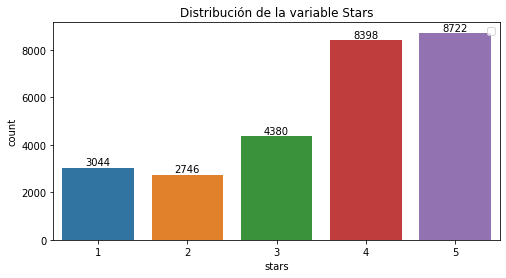

In [14]:
fig = plt.figure(figsize=(8,4))
columna = sns.countplot(x="stars", data = df)
columna.bar_label(columna.containers[0])
plt.title("Distribución de la variable Stars")
plt.legend(loc="upper right")
plt.show()

####Tipo de estrella para los 10 principales comercios con reviews

Las reviews de 4 estrellas son las que más se destacan entre los comercios más votados. Tiene una tendencia decreciente.
Las revies de 5 estrellas suben y bajan. 

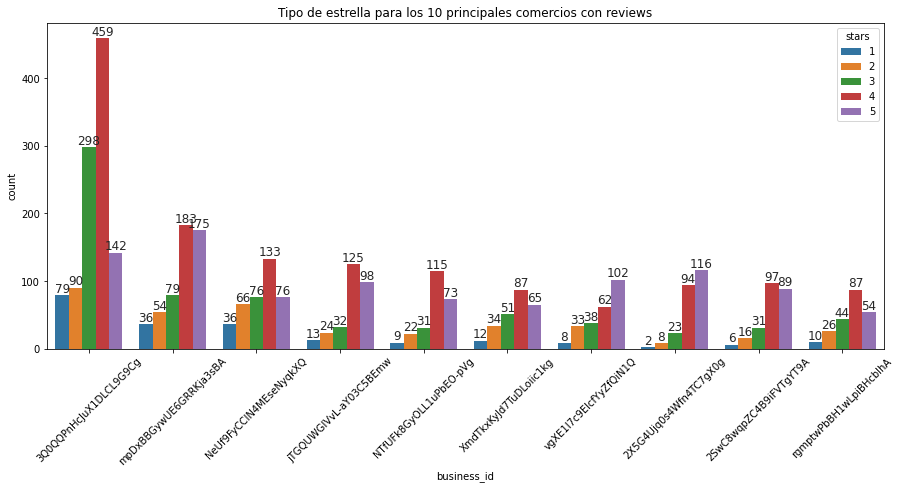

In [15]:
fig, ax = plt.subplots(figsize = (15, 6))
columna = sns.countplot(x='business_id', data=df, order=df.business_id.value_counts()[:10].index, hue = 'stars') #los diez principales comercios
plt.xticks(rotation=45)
sns.set(style="darkgrid")
for container in columna.containers:
  columna.bar_label(container)
plt.title("Tipo de estrella para los 10 principales comercios con reviews")
plt.show()

####Tipo de stars según los 10 principales usuarios

Los principales usuarios dejaron entre 3 y 4 estrellas en las reviews

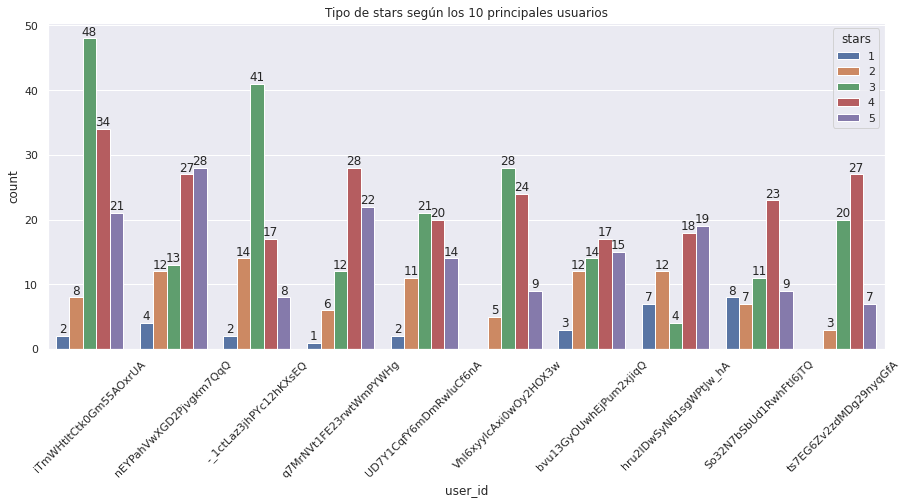

In [16]:
fig, ax = plt.subplots(figsize = (15, 6))
columna = sns.countplot(x='user_id', data=df, order=df.user_id.value_counts()[:10].index, hue = 'stars') #los diez principales clientes
plt.xticks(rotation=45)
sns.set(style="darkgrid")
columna.bar_label(columna.containers[0])
columna.bar_label(columna.containers[1])
columna.bar_label(columna.containers[2])
columna.bar_label(columna.containers[3])
columna.bar_label(columna.containers[4])
plt.title("Tipo de stars según los 10 principales usuarios")
plt.show()

####Evolución de la cantidad de estrellas a lo largo del tiempo

In [17]:
df['date'] = pd.to_datetime(df['date']) #conversión de la columna fecha a tipo datetime

In [18]:
print(f"Las reviews comprenden desde {df.date.min()} a {df.date.max()}")


Las reviews comprenden desde 2005-09-06 00:00:00 a 2015-12-24 00:00:00


In [19]:
reviews_mes = df.resample('M', on='date').sum()
reviews_mes.reset_index(inplace=True)

In [20]:
reviews_mes

,date,votes.cool,votes.funny,stars,votes.useful
0,2005-09-30,0,0,9,0
1,2005-10-31,0,0,0,0
2,2005-11-30,0,0,0,0
3,2005-12-31,1,0,4,0
4,2006-01-31,0,0,5,2
...,...,...,...,...,...
119,2015-08-31,154,95,2220,293
120,2015-09-30,174,120,1911,268
121,2015-10-31,161,107,1922,230
122,2015-11-30,170,117,1896,231


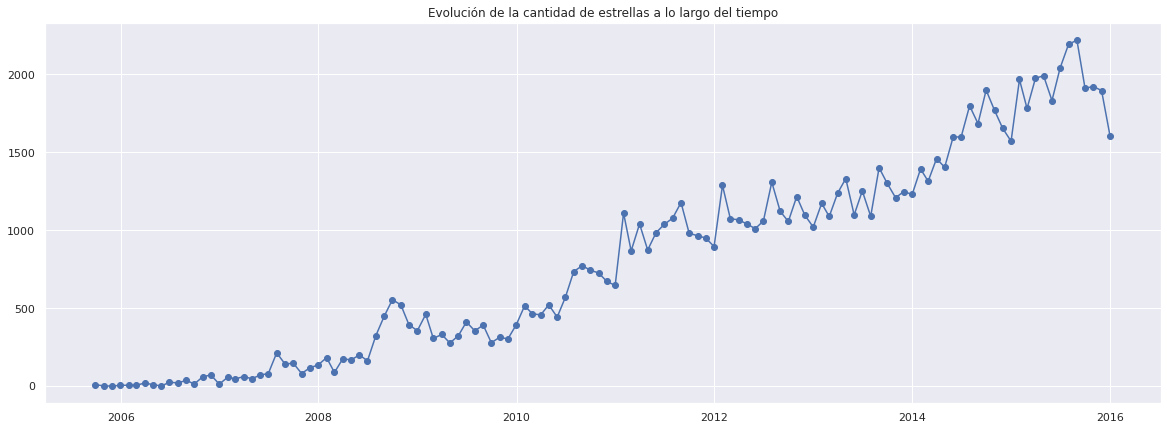

In [21]:
x=reviews_mes.date
y=reviews_mes.stars

plt.plot(x,y,marker="o")
plt.title("Evolución de la cantidad de estrellas a lo largo del tiempo")
plt.gcf().set_size_inches(20, 7)
plt.show()

###Cantidad de carácteres en el texto según la estrella

It seems like generally, the review length is the same except people that leave 4 and 5 stars tend to leave shorter reviews.

In [22]:
df['review length'] = df['text'].apply(len) #This will count the length of the review by checking how many characters there are in the review.

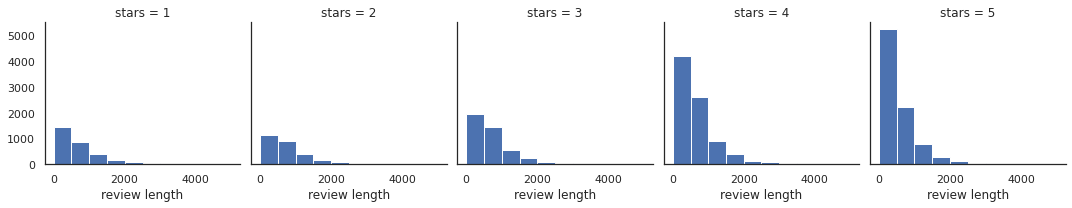

In [23]:
sns.set_style('white') #We will now create five histograms based on the star rating and review length
%matplotlib inline
g = sns.FacetGrid(df,col='stars')
g.map(plt.hist,'review length')

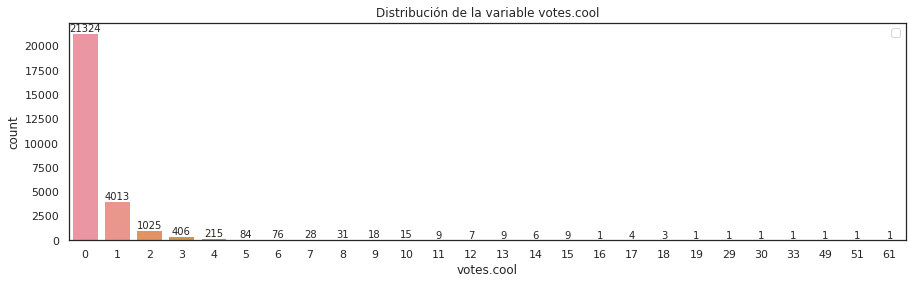

In [24]:
fig = plt.figure(figsize=(15,4))
columna = sns.countplot(x="votes.cool", data = df)
columna.bar_label(columna.containers[0])
plt.title("Distribución de la variable votes.cool")
plt.legend(loc="upper right")
plt.show()

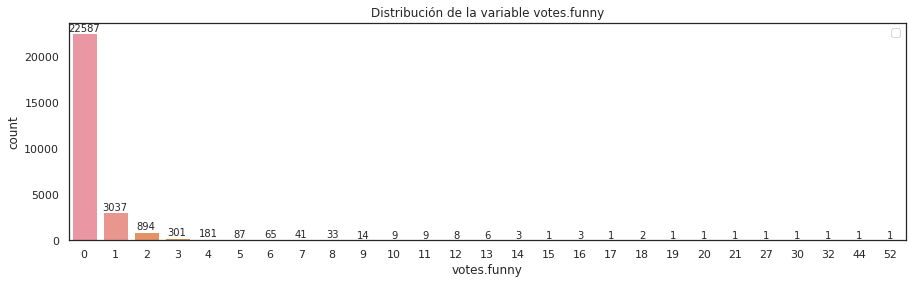

In [25]:
fig = plt.figure(figsize=(15,4))
columna = sns.countplot(x="votes.funny", data = df)
columna.bar_label(columna.containers[0])
plt.title("Distribución de la variable votes.funny")
plt.legend(loc="upper right")
plt.show()

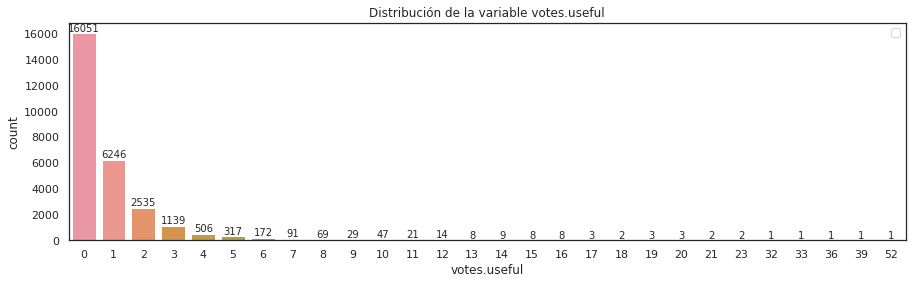

In [26]:
fig = plt.figure(figsize=(15,4))
columna = sns.countplot(x="votes.useful", data = df)
columna.bar_label(columna.containers[0])
plt.title("Distribución de la variable votes.useful")
plt.legend(loc="upper right")
plt.show()

In [27]:
reviews = pd.read_csv('reviews.csv') #We will be using the pandas package to read the CSV
reviews.shape


(27290, 10)

###StopWords - Stemming - Remove Punctuations, Numbers

In [28]:
import nltk
nltk.download('stopwords') #NLTK(Natural Language Toolkit) in python has a list of stopwords stored in 16 different languages

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Listado de Stopword almacenadas en NLTK

In [29]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [30]:
reviews = df.copy()

In [31]:
#reviews.drop(columns=['review_id', 'type', 'votes.cool', 'votes.funny', 'votes.useful', 'user_id', 'business_id'], axis = 1, inplace = True) #elimnamos las columnas que no serán necesarias


In [32]:
reviews.drop(columns=['review_id', 'type', 'votes.cool', 'votes.funny', 'votes.useful', 'user_id'], axis = 1, inplace = True) #elimnamos las columnas que no serán necesarias


In [33]:
reviews #before stopwords

,text,business_id,stars,date,review length
0,"Mr Hoagie is an institution. Walking in, it do...",5UmKMjUEUNdYWqANhGckJw,4,2012-08-01,453
1,Excellent food. Superb customer service. I mis...,5UmKMjUEUNdYWqANhGckJw,5,2014-02-13,136
2,Yes this place is a little out dated and not o...,5UmKMjUEUNdYWqANhGckJw,5,2015-10-31,380
3,All the food is great here. But the best thing...,UsFtqoBl7naz8AVUBZMjQQ,5,2013-11-08,419
4,We checked this place out this past Monday for...,UsFtqoBl7naz8AVUBZMjQQ,3,2014-03-29,706
...,...,...,...,...,...
27285,Ok I figured this would be ordinary diner food...,27cIh0prWEOO2anhGx2G8A,5,2015-06-26,384
27286,Love the food and the atmosphere. I eat here a...,27cIh0prWEOO2anhGx2G8A,5,2015-10-09,627
27287,"The service was nice, the front desk girls wer...",guh1IT9l-USl0_5naD9zaA,3,2011-01-27,382
27288,"Horrible showers, but nice folks.",guh1IT9l-USl0_5naD9zaA,2,2012-08-06,33


In [34]:
# Initialize empty array
# to append clean text

ps = PorterStemmer()
unique_words = set(stopwords.words('english'))
def cleaning_text(text, ps, unique_words):
    review = re.sub('[^a-zA-Z]', ' ', text).lower().split()
    review = [ps.stem(word) for word in review if not word in unique_words]
    review = ' '.join(review)
    return review

reviews['text'] = reviews['text'].apply(cleaning_text, **{'ps': ps, 'unique_words': unique_words})


In [35]:
reviews #after cleanning

,text,business_id,stars,date,review length
0,mr hoagi institut walk seem like throwback yea...,5UmKMjUEUNdYWqANhGckJw,4,2012-08-01,453
1,excel food superb custom servic miss mario mac...,5UmKMjUEUNdYWqANhGckJw,5,2014-02-13,136
2,ye place littl date open weekend staff alway p...,5UmKMjUEUNdYWqANhGckJw,5,2015-10-31,380
3,food great best thing wing wing simpli fantast...,UsFtqoBl7naz8AVUBZMjQQ,5,2013-11-08,419
4,check place past monday wing night heard wing ...,UsFtqoBl7naz8AVUBZMjQQ,3,2014-03-29,706
...,...,...,...,...,...
27285,ok figur would ordinari diner food best wrong ...,27cIh0prWEOO2anhGx2G8A,5,2015-06-26,384
27286,love food atmospher eat day week staff excit e...,27cIh0prWEOO2anhGx2G8A,5,2015-10-09,627
27287,servic nice front desk girl eager help room re...,guh1IT9l-USl0_5naD9zaA,3,2011-01-27,382
27288,horribl shower nice folk,guh1IT9l-USl0_5naD9zaA,2,2012-08-06,33


###Clasificación de las reviews en función de las estrellas en POS, NEG, NEU

In [36]:
reviews

,text,business_id,stars,date,review length
0,mr hoagi institut walk seem like throwback yea...,5UmKMjUEUNdYWqANhGckJw,4,2012-08-01,453
1,excel food superb custom servic miss mario mac...,5UmKMjUEUNdYWqANhGckJw,5,2014-02-13,136
2,ye place littl date open weekend staff alway p...,5UmKMjUEUNdYWqANhGckJw,5,2015-10-31,380
3,food great best thing wing wing simpli fantast...,UsFtqoBl7naz8AVUBZMjQQ,5,2013-11-08,419
4,check place past monday wing night heard wing ...,UsFtqoBl7naz8AVUBZMjQQ,3,2014-03-29,706
...,...,...,...,...,...
27285,ok figur would ordinari diner food best wrong ...,27cIh0prWEOO2anhGx2G8A,5,2015-06-26,384
27286,love food atmospher eat day week staff excit e...,27cIh0prWEOO2anhGx2G8A,5,2015-10-09,627
27287,servic nice front desk girl eager help room re...,guh1IT9l-USl0_5naD9zaA,3,2011-01-27,382
27288,horribl shower nice folk,guh1IT9l-USl0_5naD9zaA,2,2012-08-06,33


In [37]:
#We'll separate the reviews into “bad” and “good” reviews based on the stars. 
#We’ll categorize “bad” as 1 and 2 stars and “good” as 4 and 5 stars. This will help us answer the questions we created previously.
#Then we will remove all the columns except “text”, so we can begin our text analysis.

badreviews = reviews[(reviews.stars <= 2 )].text
goodreviews = reviews[(reviews.stars >= 4)].text
neutroreviews = reviews[(reviews.stars == 3)].text

In [38]:
print(f"Hay {badreviews.shape[0]} opiniones negativas, {goodreviews.shape[0]} opiniones positivas y {neutroreviews.shape[0]} opiniones neutras.")

Hay 5790 opiniones negativas, 17120 opiniones positivas y 4380 opiniones neutras.


In [39]:
reviews['type_by_stars'] = reviews.apply(
    lambda row: "POSITIVA" if row.stars >= 4 else "NEGATIVA" if row.stars <= 2 else "NEUTRA", axis=1)
reviews

,text,business_id,stars,date,review length,type_by_stars
0,mr hoagi institut walk seem like throwback yea...,5UmKMjUEUNdYWqANhGckJw,4,2012-08-01,453,POSITIVA
1,excel food superb custom servic miss mario mac...,5UmKMjUEUNdYWqANhGckJw,5,2014-02-13,136,POSITIVA
2,ye place littl date open weekend staff alway p...,5UmKMjUEUNdYWqANhGckJw,5,2015-10-31,380,POSITIVA
3,food great best thing wing wing simpli fantast...,UsFtqoBl7naz8AVUBZMjQQ,5,2013-11-08,419,POSITIVA
4,check place past monday wing night heard wing ...,UsFtqoBl7naz8AVUBZMjQQ,3,2014-03-29,706,NEUTRA
...,...,...,...,...,...,...
27285,ok figur would ordinari diner food best wrong ...,27cIh0prWEOO2anhGx2G8A,5,2015-06-26,384,POSITIVA
27286,love food atmospher eat day week staff excit e...,27cIh0prWEOO2anhGx2G8A,5,2015-10-09,627,POSITIVA
27287,servic nice front desk girl eager help room re...,guh1IT9l-USl0_5naD9zaA,3,2011-01-27,382,NEUTRA
27288,horribl shower nice folk,guh1IT9l-USl0_5naD9zaA,2,2012-08-06,33,NEGATIVA


In [40]:
reviews.groupby(by = 'type_by_stars').count()

,text,business_id,stars,date,review length
type_by_stars,,,,,
NEGATIVA,5790,5790,5790,5790,5790
NEUTRA,4380,4380,4380,4380,4380
POSITIVA,17120,17120,17120,17120,17120


###Análisis de sentimientos con TextBlob

In [41]:
def get_sentiment(text):
  sent = TextBlob(text).sentiment.polarity

  if sent > 0.1:
    return "POS"

  if sent >= -0.1 and sent <= 0.1:
    return "NEU"
  
  if sent < 0.1:
    return "NEG"

In [42]:
%%time
reviews['SENTIMENT'] = reviews["text"].apply(get_sentiment)

CPU times: user 12.7 s, sys: 18.8 ms, total: 12.7 s
Wall time: 12.7 s


In [43]:
reviews.head()

,text,business_id,stars,date,review length,type_by_stars,SENTIMENT
0,mr hoagi institut walk seem like throwback yea...,5UmKMjUEUNdYWqANhGckJw,4,2012-08-01,453,POSITIVA,POS
1,excel food superb custom servic miss mario mac...,5UmKMjUEUNdYWqANhGckJw,5,2014-02-13,136,POSITIVA,POS
2,ye place littl date open weekend staff alway p...,5UmKMjUEUNdYWqANhGckJw,5,2015-10-31,380,POSITIVA,POS
3,food great best thing wing wing simpli fantast...,UsFtqoBl7naz8AVUBZMjQQ,5,2013-11-08,419,POSITIVA,POS
4,check place past monday wing night heard wing ...,UsFtqoBl7naz8AVUBZMjQQ,3,2014-03-29,706,NEUTRA,POS


In [44]:
#reviews.groupby(by = 'SENTIMENT').count()

###WordCloud

In [45]:
%matplotlib inline
def cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

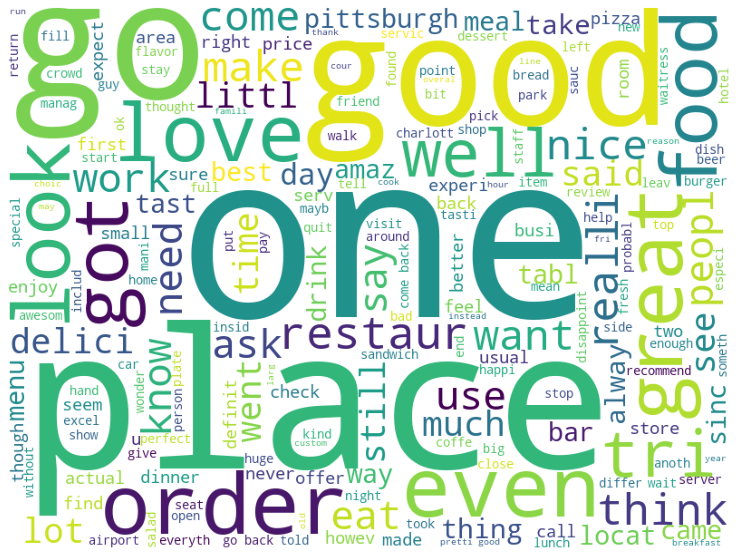

In [46]:
cloud(' '.join(reviews['text'])) #wordcloud de todas las reviews

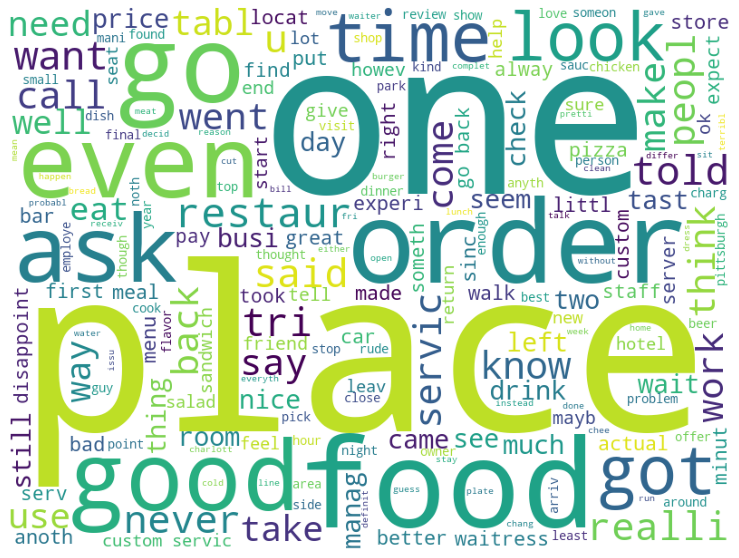

In [47]:
cloud(' '.join(reviews[reviews.stars <=2]['text'])) #wordcloud de todas las badreviews

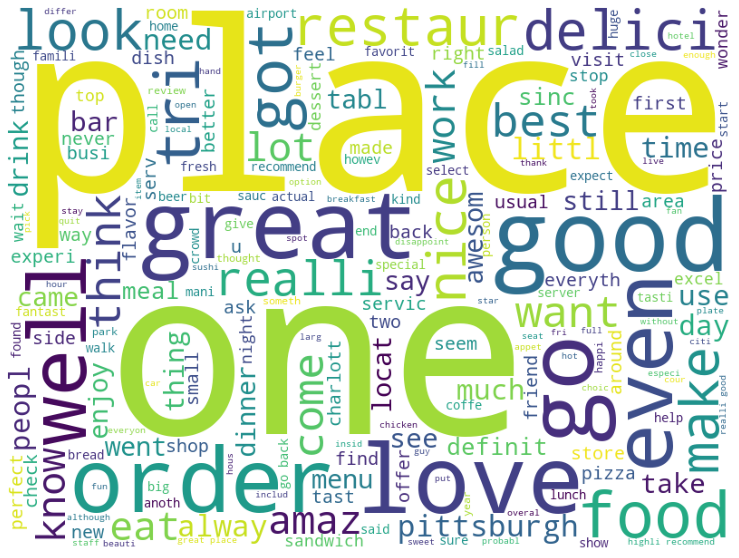

In [48]:
cloud(' '.join(reviews[(reviews.stars >=4 )]['text'])) #wordcloud de todas las goodreviews

###Preprocesamiento

###Obtener los sustantivos de cada review

In [49]:
def get_nouns(text):
  doc = nlp(text)
  nouns = [token.text for token in doc if token.pos_ == 'NOUN']
  return nouns

In [50]:
%%time
reviews['NOUNS'] = reviews['text'].apply(get_nouns)

CPU times: user 6min 3s, sys: 1.87 s, total: 6min 5s
Wall time: 6min 12s


In [51]:
noun_sentiments = reviews.explode('NOUNS').groupby(['NOUNS', 'type_by_stars'], as_index = False).agg({"text": "count"})
noun_sentiments.head(20)

,NOUNS,type_by_stars,text
0,aaa,NEGATIVA,10
1,aaa,NEUTRA,3
2,aaa,POSITIVA,10
3,aaaaaa,NEGATIVA,1
4,aaaaaaagh,POSITIVA,1
5,aaaaawesom,POSITIVA,1
6,aaaanyway,POSITIVA,1
7,aamco,POSITIVA,1
8,aback,POSITIVA,1
9,abash,NEGATIVA,1


In [52]:
noun_sentiments = reviews.explode('NOUNS').groupby(['NOUNS', 'SENTIMENT'], as_index = False).agg({"text": "count"})
noun_sentiments.head(20)

,NOUNS,SENTIMENT,text
0,aaa,NEG,5
1,aaa,NEU,9
2,aaa,POS,9
3,aaaaaa,NEG,1
4,aaaaaaagh,NEU,1
5,aaaaawesom,POS,1
6,aaaanyway,NEU,1
7,aamco,NEU,1
8,aback,POS,1
9,abash,POS,1


In [53]:
nlp.Defaults.stop_words.add("$")
nlp.Defaults.stop_words.add("+")

In [54]:
def tokenize(s):
    """Convert string to lowercase and split into words (ignoring
    punctuation), returning list of words.
    """
    word_list = re.findall(r'\w+', s.lower())
    filtered_words = [word for word in word_list if word not in stopwords.words('english')]
    return filtered_words
def count_ngrams(lines, min_length=2, max_length=4):
    """Iterate through given lines iterator (file object or list of
    lines) and return n-gram frequencies. The return value is a dict
    mapping the length of the n-gram to a collections.Counter
    object of n-gram tuple and number of times that n-gram occurred.
    Returned dict includes n-grams of length min_length to max_length.
    """
    lengths = range(min_length, max_length + 1)
    ngrams = {length: collections.Counter() for length in lengths}
    queue = collections.deque(maxlen=max_length)
# Helper function to add n-grams at start of current queue to dict
    def add_queue():
        current = tuple(queue)
        for length in lengths:
            if len(current) >= length:
                ngrams[length][current[:length]] += 1
# Loop through all lines and words and add n-grams to dict
    for line in lines:
        for word in tokenize(line):
            queue.append(word)
            if len(queue) >= max_length:
                add_queue()
# Make sure we get the n-grams at the tail end of the queue
    while len(queue) > min_length:
        queue.popleft()
        add_queue()
    return ngrams

def print_most_frequent(ngrams, num=10):
    """Print num most common n-grams of each length in n-grams dict."""
    for n in sorted(ngrams):
        print('----- {} most common {}-word phrase -----'.format(num, n))
        for gram, count in ngrams[n].most_common(num):
            print('{0}: {1}'.format(' '.join(gram), count))
        print('')
def print_word_cloud(ngrams, num=5):
    """Print word cloud image plot """
    words = []
    for n in sorted(ngrams):
        for gram, count in ngrams[n].most_common(num):
            s = ' '.join(gram)
            words.append(s)
            
    cloud = WordCloud(width=1440, height= 1080,max_words= 200).generate(' '.join(words))
    plt.figure(figsize=(20, 15))
    plt.imshow(cloud)
    plt.axis('off');
    plt.show()
    print('')

###Reviews Negativas más frecuentes

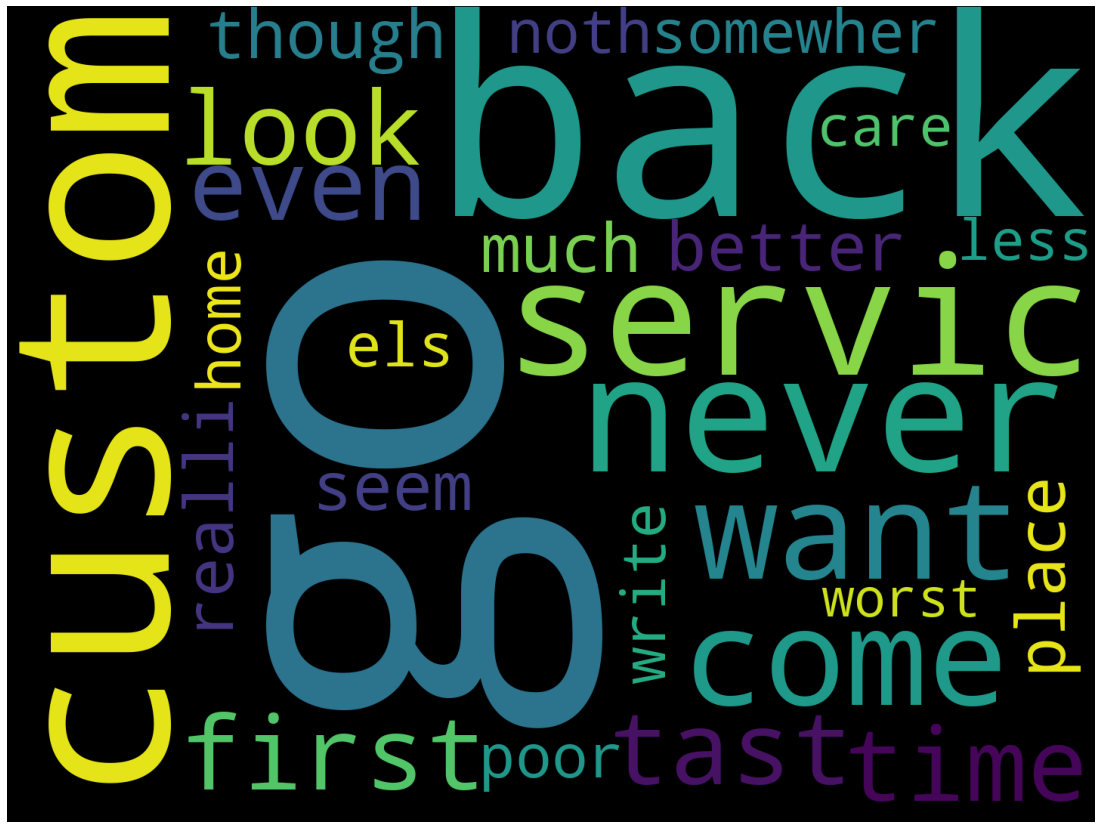

In [55]:
most_frequent_badreviews = count_ngrams(badreviews,max_length=3)
print_word_cloud(most_frequent_badreviews, 10)

In [56]:
print_most_frequent(most_frequent_badreviews, num= 10)

----- 10 most common 2-word phrase -----
go back: 518
custom servic: 470
look like: 282
come back: 266
tast like: 256
first time: 214
even though: 186
never go: 160
much better: 158
seem like: 157

----- 10 most common 3-word phrase -----
never go back: 111
realli want like: 38
want like place: 37
go somewher els: 36
would go back: 35
poor custom servic: 35
noth write home: 34
could care less: 33
worst custom servic: 32
never come back: 31



###Reviews Positivas más frecuentes

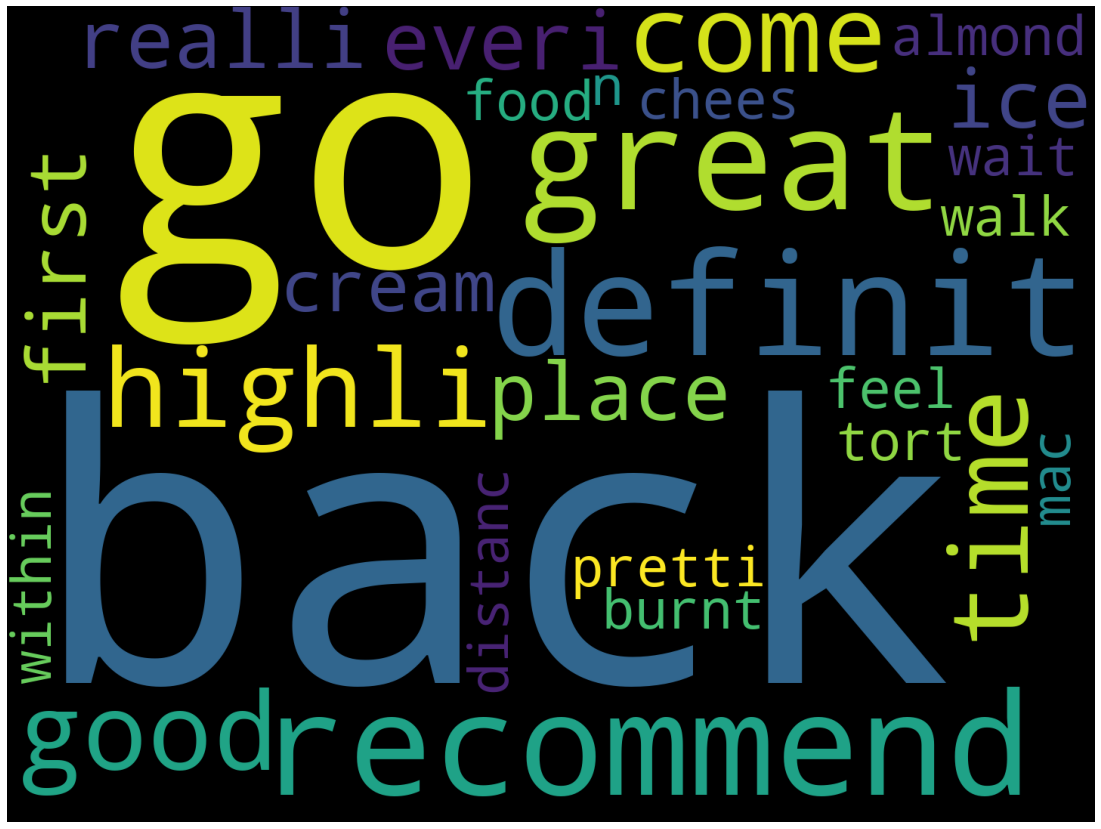

In [57]:
most_frequent_goodreviews = count_ngrams(goodreviews,max_length=3)
print_word_cloud(most_frequent_goodreviews, 10)

In [58]:
print_most_frequent(most_frequent_goodreviews, num= 10)

----- 10 most common 2-word phrase -----
go back: 839
highli recommend: 728
great place: 656
realli good: 578
come back: 556
first time: 540
everi time: 486
ice cream: 482
pretti good: 480
feel like: 473

----- 10 most common 3-word phrase -----
definit go back: 165
mac n chees: 136
would highli recommend: 109
wait go back: 106
definit come back: 92
would definit recommend: 89
would go back: 81
burnt almond tort: 76
within walk distanc: 73
great food great: 72



###Entidades por review

In [59]:
def get_entities(text):
  doc=nlp(text)
  ents = [ent.text for ent in doc.ents]
  return ents

In [60]:
%%time
reviews["NER"] = reviews["text"].apply(get_entities)
reviews.head(5)

CPU times: user 5min 57s, sys: 950 ms, total: 5min 58s
Wall time: 6min 2s


,text,business_id,stars,date,review length,type_by_stars,SENTIMENT,NOUNS,NER
0,mr hoagi institut walk seem like throwback yea...,5UmKMjUEUNdYWqANhGckJw,4,2012-08-01,453,POSITIVA,POS,"[walk, year, fashion, menu, larg, food, vote, ...","[year ago old, italian, year year, frozen ingr..."
1,excel food superb custom servic miss mario mac...,5UmKMjUEUNdYWqANhGckJw,5,2014-02-13,136,POSITIVA,POS,"[food, superb, place, tradit]",[mario machin]
2,ye place littl date open weekend staff alway p...,5UmKMjUEUNdYWqANhGckJw,5,2015-10-31,380,POSITIVA,POS,"[place, weekend, staff, order, spot, food, dai...",[weekend]
3,food great best thing wing wing simpli fantast...,UsFtqoBl7naz8AVUBZMjQQ,5,2013-11-08,419,POSITIVA,POS,"[food, thing, wing, wing, season, salt, wing, ...","[night, monday, wednesday night]"
4,check place past monday wing night heard wing ...,UsFtqoBl7naz8AVUBZMjQQ,3,2014-03-29,706,NEUTRA,POS,"[place, wing, night, wing, time, check, wing, ...","[past monday, nice chang]"


In [61]:
lista_entidades = []
lista_entidades_pos = []
lista_entidades_neg = []
lista_entidades_neu = []


for tipo, entidades in zip(reviews.type_by_stars, reviews.NER):
    lista_entidades += entidades
    if tipo == 'POSITIVA':
        lista_entidades_pos += entidades
    if tipo == 'NEGATIVA':
        lista_entidades_neg += entidades
    if tipo == 'NEUTRA':
        lista_entidades_neu += entidades



####Entidades que más se repiten en todas las reviews

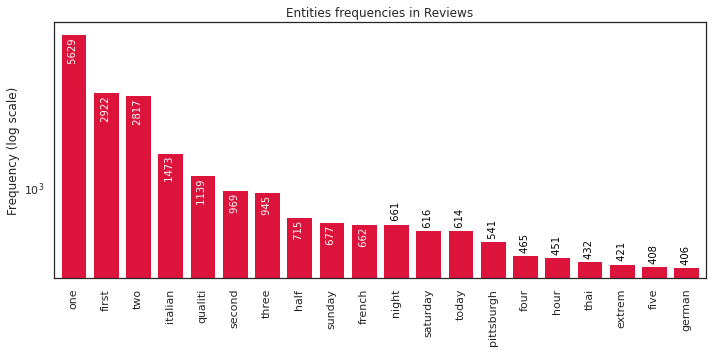

In [62]:
tf = collections.Counter(lista_entidades)

y = [count for tag, count in tf.most_common(20)]
x = [tag for tag, count in tf.most_common(20)]

fig = plt.figure(figsize=(10,5))
plt.bar(x, y, color='crimson')
plt.title("Entities frequencies in Reviews")
plt.ylabel("Frequency (log scale)")
plt.yscale('log') # optionally set a log scale for the y-axis
plt.xticks(rotation=90)
for i, (tag, count) in enumerate(tf.most_common(20)):
    plt.text(i, count, f' {count} ', rotation=90,
             ha='center', va='top' if i < 10 else 'bottom', color='white' if i < 10 else 'black')
plt.xlim(-0.6, len(x)-0.4) # optionally set tighter x lims
plt.tight_layout() # change the whitespace such that all labels fit nicely
plt.show()

####Entidades que más se repiten en todas las reviews positivas

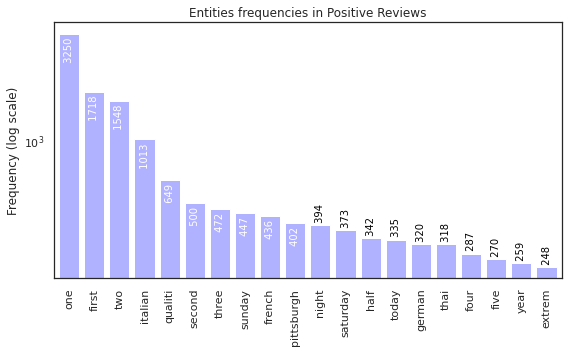

In [63]:
tf = collections.Counter(lista_entidades_pos)

y = [count for tag, count in tf.most_common(20)]
x = [tag for tag, count in tf.most_common(20)]

fig = plt.figure(figsize=(8,5))
plt.bar(x, y, color='#B1B2FF')
plt.title("Entities frequencies in Positive Reviews")
plt.ylabel("Frequency (log scale)")
plt.yscale('log') # optionally set a log scale for the y-axis
plt.xticks(rotation=90)
for i, (tag, count) in enumerate(tf.most_common(20)):
    plt.text(i, count, f' {count} ', rotation=90,
             ha='center', va='top' if i < 10 else 'bottom', color='white' if i < 10 else 'black')
plt.xlim(-0.6, len(x)-0.4) # optionally set tighter x lims
plt.tight_layout() # change the whitespace such that all labels fit nicely
plt.show()

####Entidades que más se repiten en todas las reviews negativas

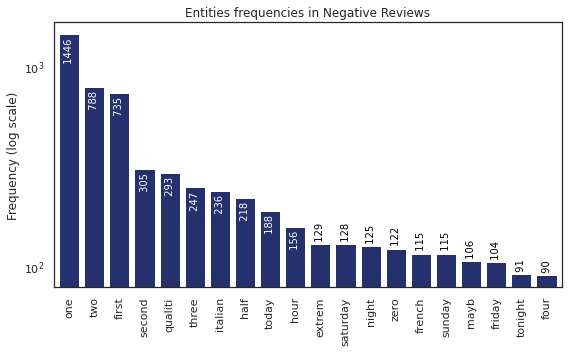

In [64]:
tf = collections.Counter(lista_entidades_neg)

y = [count for tag, count in tf.most_common(20)]
x = [tag for tag, count in tf.most_common(20)]

fig = plt.figure(figsize=(8,5))
plt.bar(x, y, color='#25316D')
plt.title("Entities frequencies in Negative Reviews")
plt.ylabel("Frequency (log scale)")
plt.yscale('log') # optionally set a log scale for the y-axis
plt.xticks(rotation=90)
for i, (tag, count) in enumerate(tf.most_common(20)):
    plt.text(i, count, f' {count} ', rotation=90,
             ha='center', va='top' if i < 10 else 'bottom', color='white' if i < 10 else 'black')
plt.xlim(-0.6, len(x)-0.4) # optionally set tighter x lims
plt.tight_layout() # change the whitespace such that all labels fit nicely
plt.show()

####Entidades que más se repiten en todas las reviews neutras

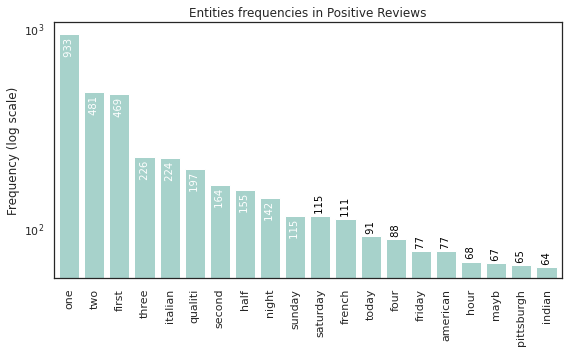

In [65]:
tf = collections.Counter(lista_entidades_neu)

y = [count for tag, count in tf.most_common(20)]
x = [tag for tag, count in tf.most_common(20)]

fig = plt.figure(figsize=(8,5))
plt.bar(x, y, color='#A7D2CB')
plt.title("Entities frequencies in Positive Reviews")
plt.ylabel("Frequency (log scale)")
plt.yscale('log') # optionally set a log scale for the y-axis
plt.xticks(rotation=90)
for i, (tag, count) in enumerate(tf.most_common(20)):
    plt.text(i, count, f' {count} ', rotation=90,
             ha='center', va='top' if i < 10 else 'bottom', color='white' if i < 10 else 'black')
plt.xlim(-0.6, len(x)-0.4) # optionally set tighter x lims
plt.tight_layout() # change the whitespace such that all labels fit nicely
plt.show()

###Negocio con más comentarios positivos

In [81]:
reviews_groupby_pos = reviews.loc[(reviews['type_by_stars'] == 'POSITIVA')]
reviews_groupby_pos = reviews_groupby_pos.groupby(by='business_id').count().sort_values(by="text", ascending=False)

###Negocio con más comentarios negativos

In [82]:
reviews_groupby_neg = reviews.loc[(reviews['type_by_stars'] == 'NEGATIVA')]
reviews_groupby_neg= reviews_groupby_neg.groupby(by='business_id').count().sort_values(by="text", ascending=False)

In [83]:
result = pd.merge(reviews_groupby_pos, reviews_groupby_neg, on='business_id', how="outer")
result = result[['text_x', 'text_y']]
#result.set_index('business_id')
result.rename(columns={'text_x':'reviews_pos', 'text_y':'reviews_neg'}, inplace=True)
result.fillna(0, inplace=True)
result.head(10)

,reviews_pos,reviews_neg
business_id,,
3Q0QQPnHcJuX1DLCL9G9Cg,601.0,169.0
mpDxBBGywUE6GRRKja3sBA,358.0,90.0
jTGQUWGIVvL-aY03C5BEmw,223.0,37.0
2X5G4Ujq0s4Wfn4TC7gX0g,210.0,10.0
NeUf9FyCCIN4MEseNyqkXQ,209.0,102.0
NTfUFk8GyOLL1uPbEO-pVg,188.0,31.0
2SwC8wqpZC4B9iFVTgYT9A,186.0,22.0
CChwRoYVXA3QZulS8a6xOQ,180.0,12.0
2Igiyhi82R8_QaaPplRmCw,179.0,12.0


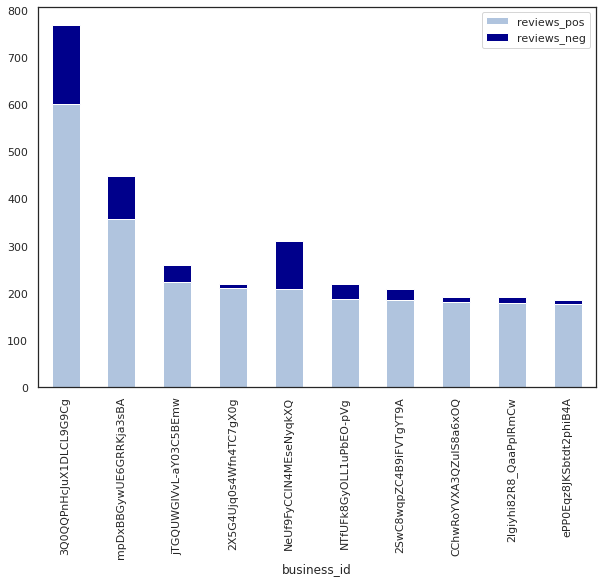

In [84]:
primeros = result.head(n=10)
primeros.plot(kind = 'bar', stacked = True, figsize=(10,7), width=0.5, bottom=0, align='center', color=['lightsteelblue', 'darkblue'])
plt.show()

###KeyBert

####Keyword Extraction

In [73]:
kw_model = KeyBERT()

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [116]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27290 entries, 0 to 27289
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   text           27290 non-null  object        
 1   business_id    27290 non-null  object        
 2   stars          27290 non-null  int64         
 3   date           27290 non-null  datetime64[ns]
 4   review length  27290 non-null  int64         
 5   type_by_stars  27290 non-null  object        
 6   SENTIMENT      27290 non-null  object        
 7   NOUNS          27290 non-null  object        
 8   NER            27290 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 1.9+ MB


In [172]:
reviews_filtrado = reviews[(reviews['review length']>200) & (reviews['type_by_stars']!='NEUTRA')]
reviews_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18769 entries, 0 to 27289
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   text           18769 non-null  object        
 1   business_id    18769 non-null  object        
 2   stars          18769 non-null  int64         
 3   date           18769 non-null  datetime64[ns]
 4   review length  18769 non-null  int64         
 5   type_by_stars  18769 non-null  object        
 6   SENTIMENT      18769 non-null  object        
 7   NOUNS          18769 non-null  object        
 8   NER            18769 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 1.4+ MB


In [173]:
reviews_filtrado.text

0        mr hoagi institut walk seem like throwback yea...
2        ye place littl date open weekend staff alway p...
3        food great best thing wing wing simpli fantast...
5        wing sauc like water pretti much lot butter ho...
6        cold cheap beer good bar food good servic look...
                               ...                        
27281    usual eat lunch break beef tip world portion p...
27283    big fan place visit stockyard time month yet b...
27285    ok figur would ordinari diner food best wrong ...
27286    love food atmospher eat day week staff excit e...
27289    stop way fort jackson great neighborhood right...
Name: text, Length: 18769, dtype: object

In [174]:
muestra = reviews_filtrado.sample(1800)
muestra

,text,business_id,stars,date,review length,type_by_stars,SENTIMENT,NOUNS,NER
16639,believ review yet thought long long time ago g...,ePP0Eqz8JKSbtdt2phiB4A,5,2013-02-22,688,POSITIVA,POS,"[time, spot, ward, peopl, drink, work, downtow...",[quarter]
8801,happen pit weekend drink loung strip happi sco...,XmdTkxKyJd7TuDLoiic1kg,4,2011-04-10,1658,POSITIVA,POS,"[pit, weekend, drink, tv, time, chanc, restaur...","[one, appet frico, cotechino, swiss, five, who..."
25929,sure yelp list ballantyn least iphon app starm...,KLYI39LFvsPzS_2-j9qgIA,4,2011-10-03,784,POSITIVA,NEU,"[yelp, list, ballantyn, edg, lunch, spot, food...","[first, half, two]"
14006,must come may even want dedic separ breakfast ...,TxKmAsKQjND5vbhBdUSyIA,5,2010-01-02,594,POSITIVA,POS,"[separ, breakfast, brunch, meal, hotcak, speci...","[dedic, yummmmi pamela, greasi]"
21912,bigg awesom live north citi hike get anytim cl...,EQDq4hZ45hDEHaWn6yuZyg,5,2012-10-10,733,POSITIVA,POS,"[north, hike, stop, absolut, place, camera, st...","[bigg awesom, week, associ, everyth, someon warm]"
...,...,...,...,...,...,...,...,...,...
5355,first like famili restaur avoid chain possibl ...,h3la53L9-OX_HlfeAySh0Q,1,2013-02-22,535,NEGATIVA,POS,"[famili, restaur, chain, possibl, possibl, fut...",[]
2737,friend go pittsburgh stop pizza perfectta miss...,lHP5STO7aomlEQixH8m1aA,5,2013-12-09,557,POSITIVA,POS,"[friend, combin, owner, thoroughli, endors, pr...","[deliveri, pleasur, last year]"
14953,standard issu chines joint complet menu food p...,JkF2CPy63ivoK1FUqprQ7w,2,2009-12-24,1109,NEGATIVA,NEU,"[complet, menu, food, pictur, employe, clariti...","[issu chines, english, john bi lo, shop strip,..."
6578,brought nativ pittsburgh gastrocultur pittsbur...,NeUf9FyCCIN4MEseNyqkXQ,4,2014-07-16,309,POSITIVA,NEU,"[sandwich, sandwich, fill, servic]",[brought nativ pittsburgh gastrocultur pittsbu...


In [178]:
%%time 
#con score
muestra["KEYWORDS"] = muestra.text.apply(lambda x: kw_model.extract_keywords(x, top_n=3, keyphrase_ngram_range=(1,1)))

CPU times: user 6min 47s, sys: 2min 34s, total: 9min 21s
Wall time: 6min 38s


In [179]:
%%time
#sin score
muestra["KEYWORDS"] = muestra.KEYWORDS.apply(lambda keywords: [k[0] for k in keywords])

CPU times: user 8.03 ms, sys: 0 ns, total: 8.03 ms
Wall time: 8.19 ms


In [180]:
muestra

,text,business_id,stars,date,review length,type_by_stars,SENTIMENT,NOUNS,NER,KEYWORDS
16639,believ review yet thought long long time ago g...,ePP0Eqz8JKSbtdt2phiB4A,5,2013-02-22,688,POSITIVA,POS,"[time, spot, ward, peopl, drink, work, downtow...",[quarter],"[downtown, place, believ]"
8801,happen pit weekend drink loung strip happi sco...,XmdTkxKyJd7TuDLoiic1kg,4,2011-04-10,1658,POSITIVA,POS,"[pit, weekend, drink, tv, time, chanc, restaur...","[one, appet frico, cotechino, swiss, five, who...","[meal, dine, broccoli]"
25929,sure yelp list ballantyn least iphon app starm...,KLYI39LFvsPzS_2-j9qgIA,4,2011-10-03,784,POSITIVA,NEU,"[yelp, list, ballantyn, edg, lunch, spot, food...","[first, half, two]","[lunch, lunchtim, waiter]"
14006,must come may even want dedic separ breakfast ...,TxKmAsKQjND5vbhBdUSyIA,5,2010-01-02,594,POSITIVA,POS,"[separ, breakfast, brunch, meal, hotcak, speci...","[dedic, yummmmi pamela, greasi]","[meal, corn, breakfast]"
21912,bigg awesom live north citi hike get anytim cl...,EQDq4hZ45hDEHaWn6yuZyg,5,2012-10-10,733,POSITIVA,POS,"[north, hike, stop, absolut, place, camera, st...","[bigg awesom, week, associ, everyth, someon warm]","[hike, bigg, photographi]"
...,...,...,...,...,...,...,...,...,...,...
5355,first like famili restaur avoid chain possibl ...,h3la53L9-OX_HlfeAySh0Q,1,2013-02-22,535,NEGATIVA,POS,"[famili, restaur, chain, possibl, possibl, fut...",[],"[restaur, avoid, waitress]"
2737,friend go pittsburgh stop pizza perfectta miss...,lHP5STO7aomlEQixH8m1aA,5,2013-12-09,557,POSITIVA,POS,"[friend, combin, owner, thoroughli, endors, pr...","[deliveri, pleasur, last year]","[pizza, pittsburgh, famili]"
14953,standard issu chines joint complet menu food p...,JkF2CPy63ivoK1FUqprQ7w,2,2009-12-24,1109,NEGATIVA,NEU,"[complet, menu, food, pictur, employe, clariti...","[issu chines, english, john bi lo, shop strip,...","[chines, food, broccoli]"
6578,brought nativ pittsburgh gastrocultur pittsbur...,NeUf9FyCCIN4MEseNyqkXQ,4,2014-07-16,309,POSITIVA,NEU,"[sandwich, sandwich, fill, servic]",[brought nativ pittsburgh gastrocultur pittsbu...,"[cheesesteak, sandwich, gastrocultur]"


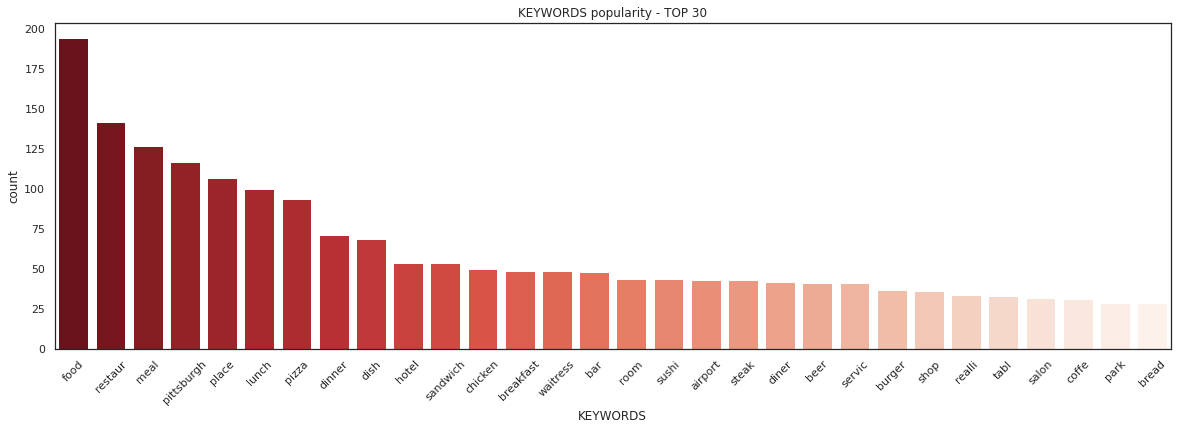

In [181]:
plt.figure(figsize=(20,6))
sns.countplot(x=muestra.explode("KEYWORDS").KEYWORDS, 
              order=muestra.explode("KEYWORDS").KEYWORDS.value_counts().index[:30],
              palette='Reds_r')
plt.title("KEYWORDS popularity - TOP 30")
plt.xticks(rotation=45)
plt.show()

####BertTopic

In [182]:
%%time
topic_model = BERTopic(calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(muestra["text"].values)

Batches:   0%|          | 0/57 [00:00<?, ?it/s]

2022-09-12 23:39:26,458 - BERTopic - Transformed documents to Embeddings
2022-09-12 23:39:44,282 - BERTopic - Reduced dimensionality
2022-09-12 23:39:44,528 - BERTopic - Clustered reduced embeddings


CPU times: user 1min 54s, sys: 6.6 s, total: 2min
Wall time: 2min 2s


In [183]:
topics_data = topic_model.get_topic_info()
topics_data

,Topic,Count,Name
0,-1,788,-1_food_place_good_like
1,0,125,0_car_servic_call_work
2,1,78,1_beer_bar_select_great
3,2,60,2_airport_flight_get_secur
4,3,57,3_pittsburgh_place_sandwich_good
5,4,56,4_store_shop_one_item
6,5,48,5_hair_salon_stylist_cut
7,6,46,6_theater_show_venu_music
8,7,43,7_sauc_order_dessert_restaur
9,8,42,8_great_food_servic_place


In [ ]:
muestra["TOPIC_ID"] = topics
muestra = muestra.merge(topics_data, left_on="TOPIC_ID", right_on="Topic", how="left")
muestra = muestra.rename(columns={"Name": "TOPIC_NAME", "Count": "TOPIC_POPULARITY"})
muestra = muestra.drop(["Topic"], axis=1)
muestra.head(3)

In [185]:
topic_model.visualize_topics()

In [186]:
topic_model.visualize_hierarchy()

In [187]:
topic_model.visualize_barchart()

In [188]:
topic_model.visualize_heatmap()

In [189]:
topic_model.visualize_distribution(probs[0])